In [1]:
from datetime import datetime
import itertools
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
from iexfinance.stocks import get_historical_data
def get_iex_data(stock_list, start=datetime(2015,1,1), end=datetime(2019,12,31)):
    return_list = []
    for i in stock_list:
        df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
        df['ticker'] = i
        return_list.append(df)
    return return_list

## Import Data

In [3]:
hun_etfs = ['MBB']
data = get_iex_data(hun_etfs)
data

[              open    high     low   close   volume ticker
 date                                                      
 2015-01-15  109.90  110.08  109.90  110.08  2789188    MBB
 2015-01-16  110.01  110.08  109.68  109.76  1197619    MBB
 2015-01-20  109.88  109.94  109.68  109.76   502899    MBB
 2015-01-21  109.65  109.74  109.60  109.71  2108609    MBB
 2015-01-22  109.88  109.91  109.63  109.84   331976    MBB
 ...            ...     ...     ...     ...      ...    ...
 2019-12-24  107.81  107.94  107.78  107.93  1172728    MBB
 2019-12-26  107.94  107.96  107.87  107.93   664594    MBB
 2019-12-27  108.02  108.15  107.99  108.15  2890815    MBB
 2019-12-30  108.06  108.16  108.04  108.11  1050050    MBB
 2019-12-31  108.16  108.18  108.06  108.06   790024    MBB
 
 [1249 rows x 6 columns]]

In [4]:
mbb = data[0]
mbb.to_csv('mbb.csv', encoding='utf-8')

In [5]:
def clean_data(data):
    for i in range(len(data)):
        data[i] = data[i].reset_index()
        data[i]['date'] = pd.to_datetime(data[i]['date'])
        data[i] = data[i].set_index('date')
    return data

In [6]:
data = clean_data(data)

In [7]:
data

[              open    high     low   close   volume ticker
 date                                                      
 2015-01-15  109.90  110.08  109.90  110.08  2789188    MBB
 2015-01-16  110.01  110.08  109.68  109.76  1197619    MBB
 2015-01-20  109.88  109.94  109.68  109.76   502899    MBB
 2015-01-21  109.65  109.74  109.60  109.71  2108609    MBB
 2015-01-22  109.88  109.91  109.63  109.84   331976    MBB
 ...            ...     ...     ...     ...      ...    ...
 2019-12-24  107.81  107.94  107.78  107.93  1172728    MBB
 2019-12-26  107.94  107.96  107.87  107.93   664594    MBB
 2019-12-27  108.02  108.15  107.99  108.15  2890815    MBB
 2019-12-30  108.06  108.16  108.04  108.11  1050050    MBB
 2019-12-31  108.16  108.18  108.06  108.06   790024    MBB
 
 [1249 rows x 6 columns]]

In [8]:
ts = data[0]['close']

## ARIMA analysis

In [9]:
# p = d = q = range(0,3)
# pdq = list(itertools.product(p,d,q))
# pdqs = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(ts,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             output = mod.fit()
#             ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))
#         except:
#             continue    

In [10]:
# ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [11]:
ARIMA_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(2, 2, 2),
                                seasonal_order=(0, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
output = ARIMA_model.fit()
print(output.summary().tables[1])


C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9526      0.247     -3.860      0.000      -1.436      -0.469
ar.L2         -0.0660      0.040     -1.655      0.098      -0.144       0.012
ma.L1         -0.1324      0.244     -0.542      0.588      -0.611       0.346
ma.L2         -0.8638      0.244     -3.546      0.000      -1.341      -0.386
ma.S.L5       -0.0076      0.028     -0.272      0.786      -0.063       0.047
ma.S.L10       0.0337      0.026      1.307      0.191      -0.017       0.084
sigma2         0.0296      0.001     33.256      0.000       0.028       0.031


In [12]:
csv_output = output.summary().tables[1]

summary_df = pd.DataFrame(csv_output, index=None)
# csv_output.to_csv('spy_summary.csv', encoding='utf-8')
# csv_output
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df[1:]

summary_df.to_csv('mbb_summary.csv', encoding='utf-8')
summary_df


,,coef,std err,z,P>|z|,[0.025,0.975]
1,ar.L1,-0.9526,0.247,-3.860,0.000,-1.436,-0.469
2,ar.L2,-0.0660,0.040,-1.655,0.098,-0.144,0.012
3,ma.L1,-0.1324,0.244,-0.542,0.588,-0.611,0.346
4,ma.L2,-0.8638,0.244,-3.546,0.000,-1.341,-0.386
5,ma.S.L5,-0.0076,0.028,-0.272,0.786,-0.063,0.047
6,ma.S.L10,0.0337,0.026,1.307,0.191,-0.017,0.084
7,sigma2,0.0296,0.001,33.256,0.000,0.028,0.031


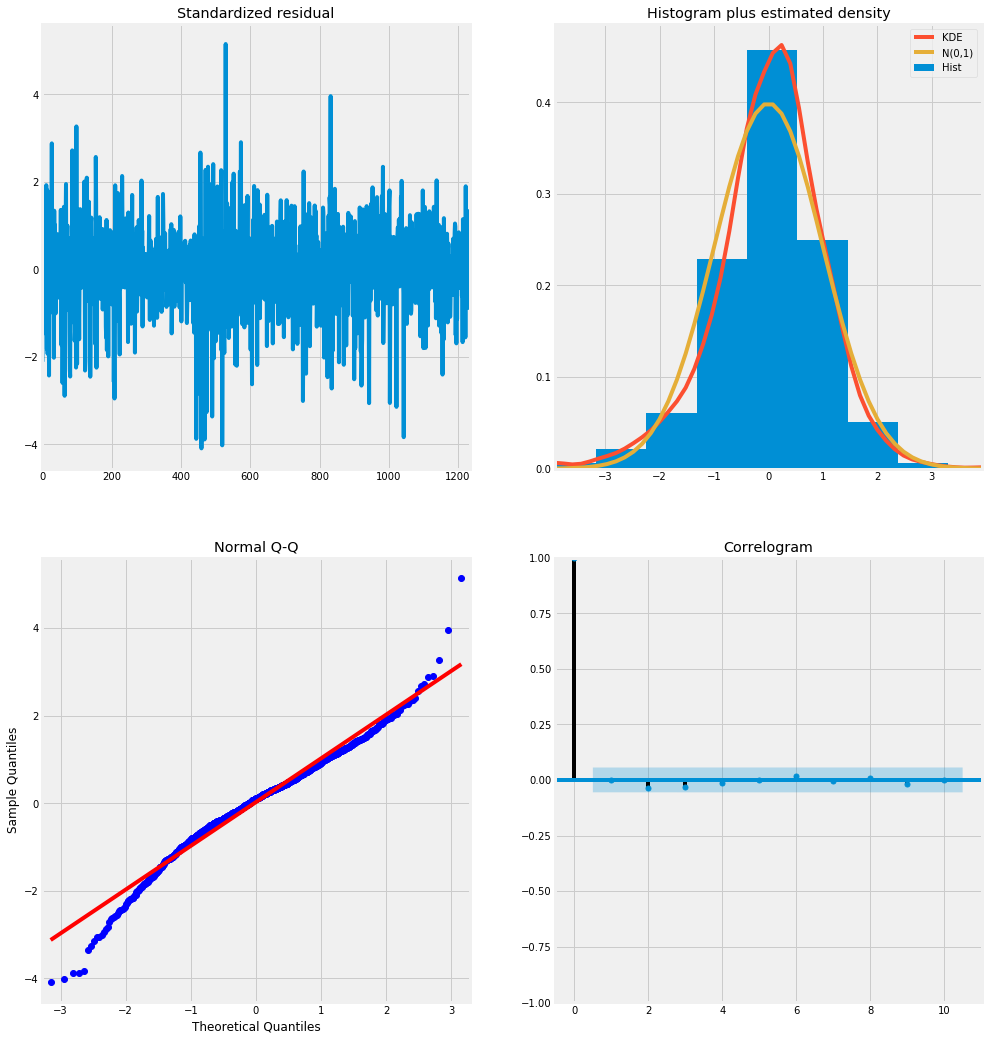

In [13]:
output.plot_diagnostics(figsize=(15, 18))
plt.savefig('mbboutput.png')
plt.show()

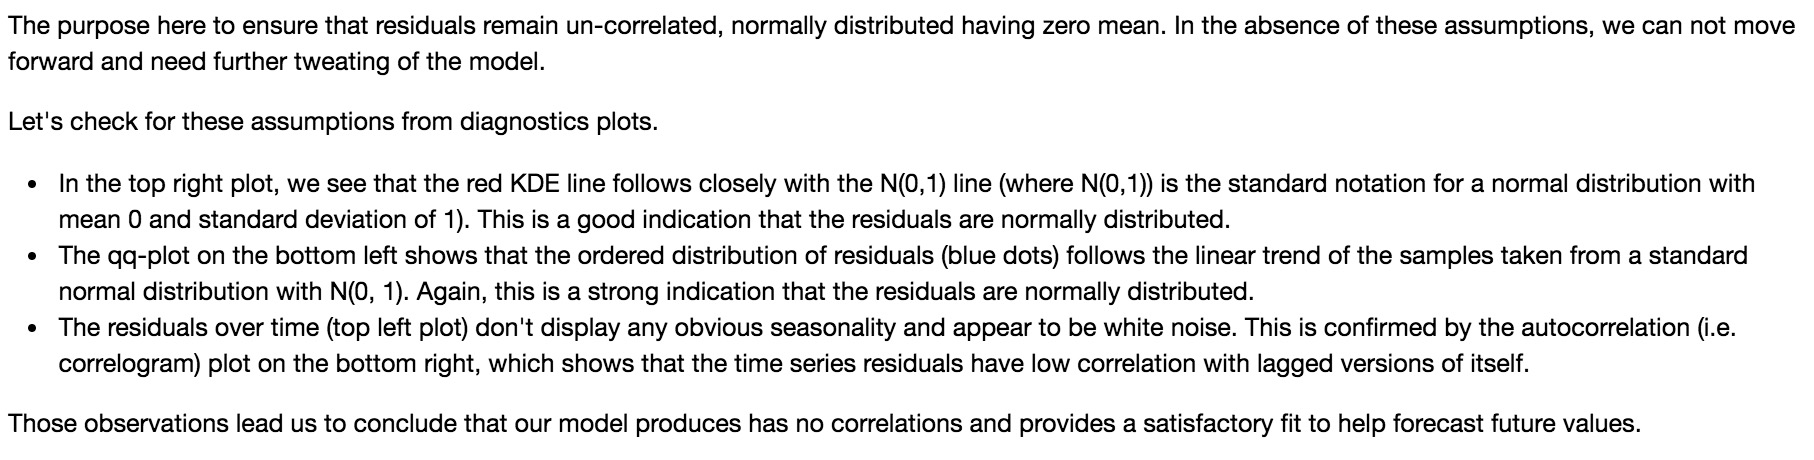

In [31]:
# plt.savefig('arima1.png')

<Figure size 432x288 with 0 Axes>

In [14]:
pred = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_conf = pred.conf_int()

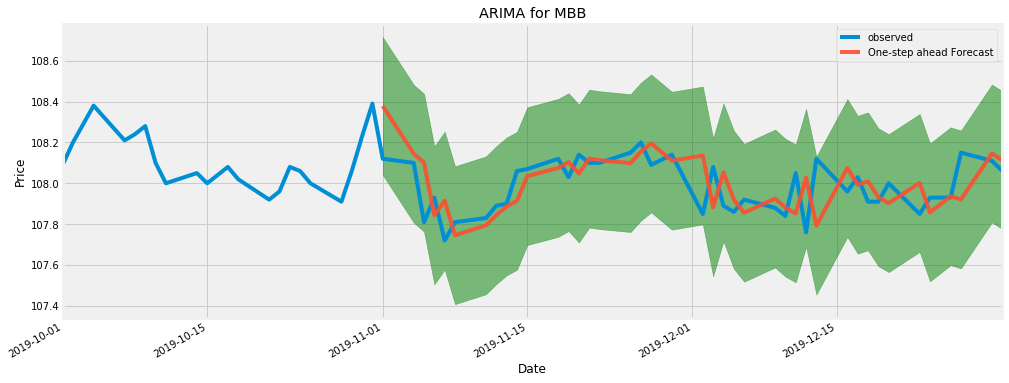

In [15]:
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = ts['2019-10':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
plt.title('ARIMA for MBB')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.savefig('mbb_arima.png')
plt.show()

In [16]:
price_forecasted = pred.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.02


In [17]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

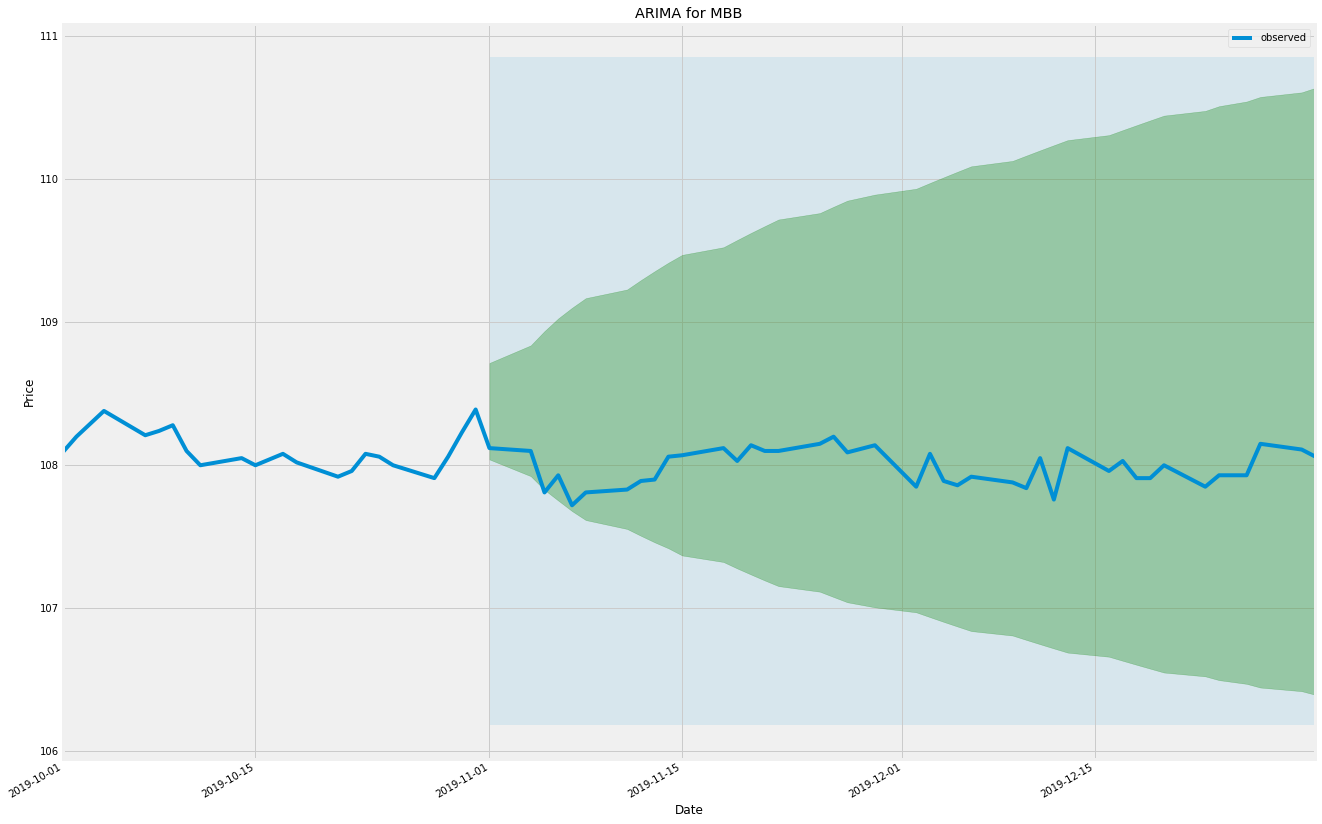

In [18]:
ax = ts['2019-10':].plot(label='observed', figsize=(20, 15))
# datum.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-11-01'), price_forecasted.index[-1], alpha=.1, zorder=-1)

plt.title('ARIMA for MBB')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.savefig('mbb_arima2.png')
plt.show()

In [19]:
price_forecasted = pred_dynamic.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.23


In [20]:
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


## FBProphet for Future

In [21]:
from fbprophet import Prophet as proph
spy = pd.DataFrame(data[0]['close']).reset_index()
spy.columns = ['ds', 'y']

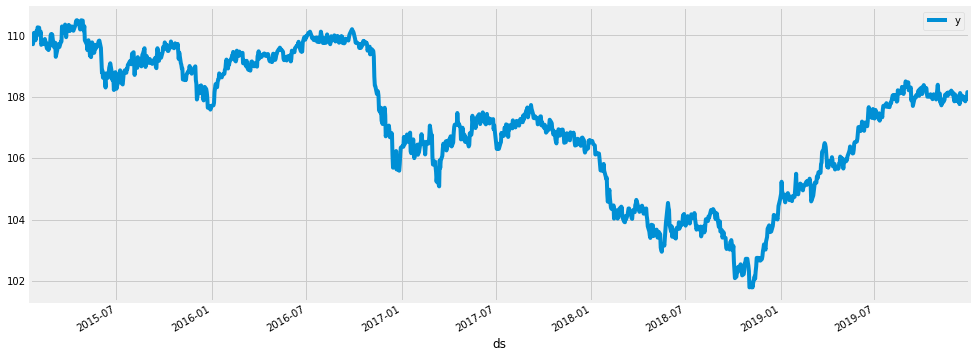

In [22]:
spy.set_index('ds').plot()

In [23]:
p = proph(interval_width=.95)
p.fit(spy)
inp = p.make_future_dataframe(periods=30, freq='D')
out = p.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [24]:
df = out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [25]:
mbb_df_novjan = df.tail(71)
mbb_df_novjan.dtypes

ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object

In [26]:
# def get_iex_data(stock_list, start=datetime(2019,11,1), end=datetime(2020,1,10)):
#     return_list = []
#     for i in stock_list:
#         df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
#         df['ticker'] = i
#         return_list.append(df)
#     return return_list
# etf = ['VV']
# data = get_iex_data(etf)
# pull = data[0]['close']
# pull_df = pd.DataFrame(pull)

In [27]:
# pull_df

In [26]:
mbb_yf = pd.read_csv('MBB_yf.csv')
mbb_yf = mbb_yf.rename(columns={"Date": "ds"})
mbb_yf['ds'] = pd.to_datetime(mbb_yf['ds'])

mbb_yf.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [27]:
mbb_yf1 = mbb_yf[['ds','Adj Close']]
mbb_yf1

,ds,Adj Close
0,2019-11-01,107.813065
1,2019-11-04,107.793121
2,2019-11-05,107.503937
3,2019-11-06,107.623604
4,2019-11-07,107.414207
5,2019-11-08,107.503937
6,2019-11-11,107.523888
7,2019-11-12,107.583717
8,2019-11-13,107.593689
9,2019-11-14,107.753227


In [28]:
comb = mbb_df_novjan.join(mbb_yf1.set_index('ds'), on='ds')
# comb = comb.set_index('ds')
comb['difference'] = comb['Adj Close'] - comb['yhat']
comb['difference_pct'] = comb['difference']/comb['Adj Close']
comb['difference_pct'] = comb['difference_pct'].map("{:.2%}".format)
comb.to_csv('mbb_predict_fbprophet.csv', encoding='utf-8')
comb = comb.drop([1249])
comb = comb.drop([1252])
comb = comb.drop([1253])
comb = comb.drop([1259])
comb = comb.drop([1260])
comb = comb.drop([1266])
comb = comb.drop([1267])
comb = comb.drop([1268])
comb = comb.drop([1273])
comb = comb.drop([1274])
comb.tail(50)

,ds,yhat,yhat_lower,yhat_upper,Adj Close,difference,difference_pct
1219,2019-11-18,107.935260,107.393323,108.432575,107.813065,-0.122195,-0.11%
1220,2019-11-19,107.937165,107.415759,108.474828,107.723312,-0.213853,-0.20%
1221,2019-11-20,107.944919,107.448236,108.478504,107.833008,-0.111911,-0.10%
1222,2019-11-21,107.956801,107.460180,108.465444,107.793121,-0.163680,-0.15%
1223,2019-11-22,107.972861,107.463477,108.498856,107.793121,-0.179740,-0.17%
1224,2019-11-25,107.971884,107.463893,108.500720,107.842979,-0.128905,-0.12%
1225,2019-11-26,107.979447,107.439894,108.480173,107.892838,-0.086609,-0.08%
1226,2019-11-27,107.991040,107.449219,108.519956,107.783142,-0.207898,-0.19%
1227,2019-11-29,108.020887,107.517043,108.573812,107.833008,-0.187879,-0.17%
1228,2019-12-02,108.008618,107.482494,108.510920,107.794029,-0.214589,-0.20%


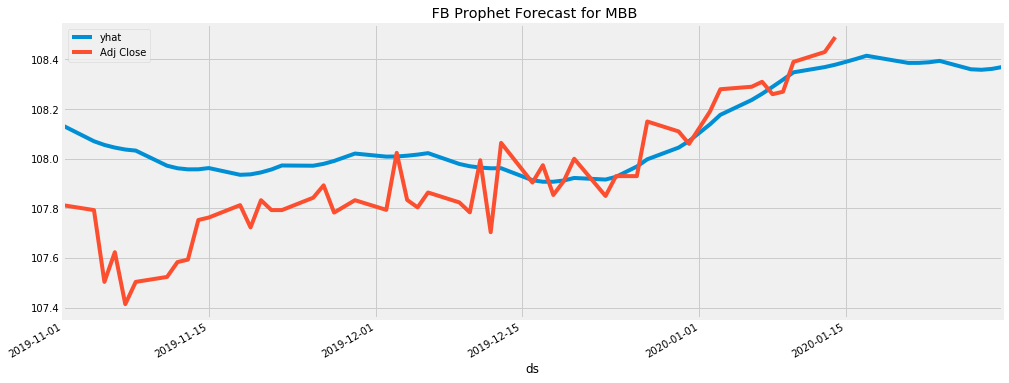

In [29]:
comb.plot(x="ds", y=["yhat", "Adj Close"], kind="line")
plt.title(' FB Prophet Forecast for MBB')
plt.savefig('mbb_fbproph_forecast.png')

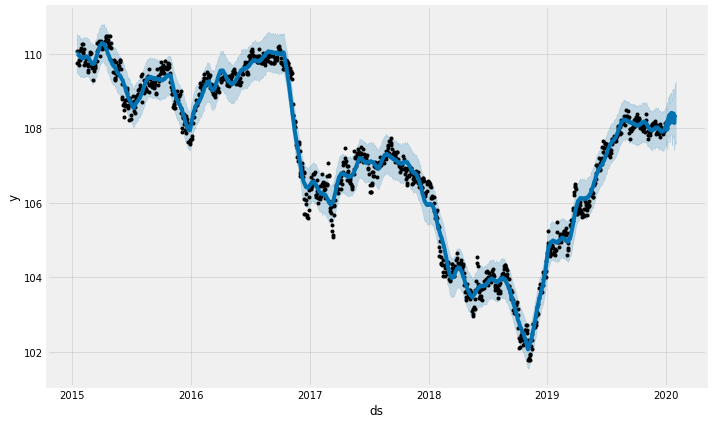

In [30]:
p.plot(df)
plt.savefig('mbb_fbp2.png')

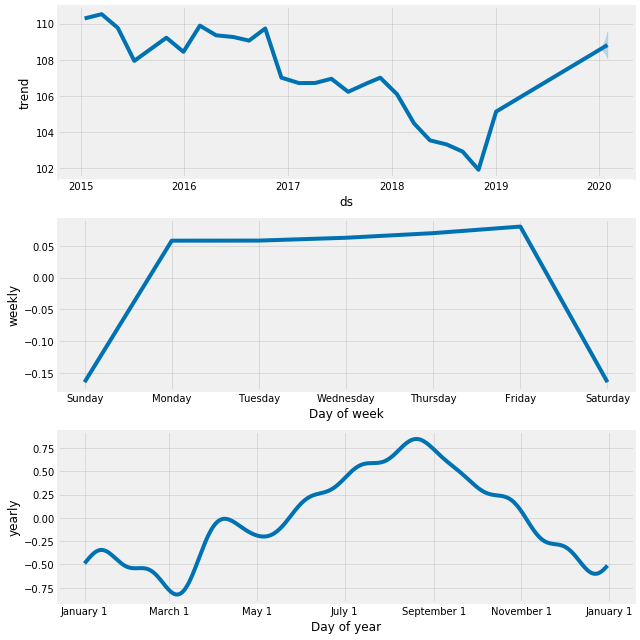

In [31]:
p.plot_components(out)
# plt.title('DIA Seasonality Trends')
plt.savefig('mbb_seasonality.png')

In [32]:
split = pd.to_datetime('2019-12-01')
true = spy.set_index('ds')[split:]
past = spy.set_index('ds')[:split].reset_index()

In [33]:
pro = proph(interval_width=.95)
pro.fit(past)
inp = pro.make_future_dataframe(periods=20, freq='D').set_index('ds')[split:].reset_index()
out = pro.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
pred = out[['ds', 'yhat']].set_index('ds')
pred

,yhat
ds,
2019-12-01,108.093859
2019-12-02,108.131355
2019-12-03,108.128753
2019-12-04,108.143734
2019-12-05,108.156014
2019-12-06,108.165406
2019-12-07,108.120338
2019-12-08,108.120657
2019-12-09,108.149934
